<a href="https://colab.research.google.com/github/TungSoPon/bsc_dpdm22/blob/main/Classification_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
from sklearn.datasets import load_digits
digits = load_digits()

import matplotlib.pyplot as plt

In [67]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

8


<Figure size 432x288 with 0 Axes>

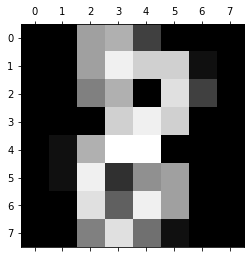

In [68]:
ind = 28
plt.gray()
plt.matshow(digits.images[ind])
print(digits.target[ind])

# Quiz 3 march

- แบ่ง data ออกเป็น 80%(train) 20%(test) โดยใช้ random_state = เลขกลุ่ม shuffle=True
- หา parameters ที่ดีที่สุด (K (1,3,5), Distance_weighted(yes/no)) ด้วย 10-fold-cross-validation
- test parameters ที่ดีที่สุด กับ test data


In [69]:
from sklearn.model_selection import train_test_split, cross_val_score

In [70]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=8)


In [71]:
from sklearn.neighbors import KNeighborsClassifier

## model selection

In [72]:
# model 1 (K=1, weighted)
knn_distance = KNeighborsClassifier(n_neighbors=1, weights='distance')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K1weighted", scores.mean())

# model 2 (K=3, weighted)
knn_distance = KNeighborsClassifier(n_neighbors=3, weights='distance')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K3weighted", scores.mean())

# model 3 (K=5, weighted)
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K5weighted", scores.mean())

# model 4 (K=1, no weighted)
knn_distance = KNeighborsClassifier(n_neighbors=1, weights='uniform')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K1NOweighted", scores.mean())

# model 5 (K=3, no weighted)
knn_distance = KNeighborsClassifier(n_neighbors=3, weights='uniform')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K3NOweighted", scores.mean())

# model 6 (K=5, no weighted)
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='uniform')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: KNOweighted", scores.mean())

Mean Cross-Validation Score: K1weighted 0.9804972804972805
Mean Cross-Validation Score: K3weighted 0.9867667055167055
Mean Cross-Validation Score: K5weighted 0.98258547008547
Mean Cross-Validation Score: K1NOweighted 0.9804972804972805
Mean Cross-Validation Score: K3NOweighted 0.9867667055167055
Mean Cross-Validation Score: KNOweighted 0.9832799145299145


## Evaluate with test set

In [73]:
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')

knn_distance.fit(X_train,y_train)

yknn_pred = knn_distance.predict(X_test)

In [74]:
from sklearn.metrics import accuracy_score

# Assume y_true and y_pred are the true and predicted labels, respectively
accuracykkn = accuracy_score(y_test, yknn_pred)

# Print the accuracy score
print("Accuracy ,KNN score: ", accuracykkn)


Accuracy ,KNN score:  0.9916666666666667


# HW 7 
หา โมเดลที่ดีที่สุด จาก DT,NaiveBayes,KNN,ANN โดย เปรียบเทียบ อย่างละสอง parameter sets 

#DecisionTreeClassifier

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold

In [76]:
model = DecisionTreeClassifier()
#cv = KFold(3)

# Compute the cross-validation scores
scores = cross_val_score(model, X_train, y_train)#, cv=cv)

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Print the mean and standard deviation of the cross-validation scores
print("Mean accuracy DecisionTree Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross-validation scores: [0.87152778 0.85069444 0.83275261 0.80836237 0.84320557]
Mean accuracy DecisionTree Score: 0.84 (+/- 0.04)


In [77]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

yDT_pred = dtc.predict(X_test)

In [78]:
accuracyDT = accuracy_score(y_test, yDT_pred)

print("Accuracy DT score: ", accuracyDT)

Accuracy DT score:  0.8416666666666667


#naive

In [79]:
from sklearn.naive_bayes import GaussianNB

In [80]:
gnb = GaussianNB()

# Train the model on the training data
gnb.fit(X_train, y_train)

# Evaluate the model on the testing data
accuracyNA = gnb.score(X_test, y_test)
print("Accuracy naive: {:.2f}".format(accuracyNA))

Accuracy naive: 0.82


#ANN

In [81]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [87]:

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10,)))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

ValueError: ignored

In [84]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
X_train = X_train.reshape(-1, 4)
X_test = X_test.reshape(-1, 4)

# Create a sequential model
model = Sequential()

# Add a dense layer with 10 units and ReLU activation
model.add(Dense(10, activation='relu', input_shape=(4,)))

# Add a dense layer with 3 units and softmax activation
model.add(Dense(3, activation='softmax'))

# Compile the model with categorical cross-entropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

# Evaluate the model on the testing data
loss, accuracyANN = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {:.2f}".format(accuracyANN))

ValueError: ignored